## Stemmen voor alles behalve de stem
### Een visuele analyse van het stemgedrag bij het Eurovisie Songfestival

Ieder jaar, zo halverwege mei, verbindt het Eurovisie Songfestival de muziekliefhebbers over heel Europa. Het festival werd voor het eerst gehouden in 1956 met slechts zeven landen. Vandaag de dag doen er rond de veertig landen mee. Ieder land treedt op met een zelfgeschreven nummer, waarna er via stemming van een jury en televoting een winnaar wordt bepaald. Ieder land reikt punten uit waarbij 50 procent via televoting en 50 procent via een jury bepaald worden. Tot 2016 gaf een land 1 tot en met 8, 10 en 12 punten aan andere landen. Vanaf 2016 werden dit twee sets, één namens de jury en één namens televoting. Onderstaand figuur geeft de punten weer die de landen gehaald hebben over de jaren 

In [41]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

color_blind_red, color_blind_green, color_blind_blue = '#d95f02', '#1b9e77', '#7570b3'

In [42]:
# Importeer het dataframe met de punten die gegeven zijn per songfestival
euro_df = pd.read_csv('eurovision_song_contest_1975_2019.csv')
euro_df.columns=[column.strip() for column in euro_df.columns]
# euro_df.head()

In [43]:
def total_points(dataframe):
    """
    Itereert door het eurovisie dataframe en maakt een dictionary met daarin alle landen
    als key en de punten die de landen hebben gehaald in de vorm van een lijst als value.
    Vervolgens berekent de functie het gemiddelde van de totale punten. 
    Er wordt een pandas dataframe met de landen als kolom en de gemiddelde punten teruggegeven.
    """
    # Maak een lege dictionary aan
    points = {}

    # Itereer over de dataframe
    for index, row in dataframe.iterrows():

        # Controleer of het om een finale gaat
        # Zo niet, ga dan naar het volgende item in de dataframe
        if row[1] == 'f':

            # Als het land al in de dictionary staat, moeten de punten worden
            # toegevoegd aan de lijst
            if row[5] in points:
                points[row[5]].append(row[6])

            # Als het land nog niet in de dictionary staat moet deze worden
            # toegevoegd met de punten
            else:
                points.update({row[5]:[row[6]]})
    
    # Maak een nieuwe dictionary om de gemiddelde punten per land in te kunnen doen
    totals = {}

    # Itereer over de points dictionary
    # Bereken de gemiddeldes van de lijst met punten
    for country in points:
        totals.update({country:sum(points[country])/len(points[country])})

    # Return een dataframe op basis van de totals dictionary
    return pd.DataFrame([{"Country":country, "Points":points} for country, points in totals.items()])

average_points = total_points(euro_df)


In [44]:
# Maak een figuur van de wereldkaart met de gemiddelde punten die landen gehaald hebben in
# de finales van het songfestival
average_points_fig = px.choropleth(average_points,
                    locationmode='country names', 
                    locations='Country', 
                    color='Points',
                    title='Gemiddelde aantal punten dat landen hebben gekregen in de finale',
                    height=600,
                    color_continuous_scale=['#1E88E5', '#FFC107', '#FF005D']
                    )

# Laat het figuur zien
# average_points_fig.show()

In [45]:
def total_per_year(dataframe):
    total_year = {}
    
    for index, row in dataframe.iterrows():
        if row[1] == 'f':
            if row[5] in total_year:
                if row[0] in total_year[row[5]]:
                    total_year[row[5]][row[0]] += row[6]
                else:
                    total_year[row[5]].update({row[0]: row[6]})
            else:
                total_year.update({row[5]: {row[0]:row[6]}})
    
    total_per_year_df = pd.DataFrame({'Country':[], 'Year':[], 'Points':[]})

    for country, euro_df in total_year.items():
        for year, score in euro_df.items():
            total_per_year_df.loc[len(total_per_year_df)] = [country, year, score]

    return total_per_year_df

points_per_year = total_per_year(euro_df)


In [46]:
points_per_year['Year'] = pd.Categorical(points_per_year['Year'], ordered=True)
year_order = [year for year in range(1975, 2019)]

fig_per_year = px.choropleth(points_per_year, 
                    locationmode='country names', 
                    locations='Country', 
                    color='Points',
                    animation_frame='Year',
                    category_orders={'Year':year_order},
                    title='Totale aantal punten dat een land in de finale heeft gekregen per jaar',
                    height=700,
                    color_continuous_scale=['#1E88E5', '#FFC107', '#FF005D'])
fig_per_year.show()

### Culturele factoren
Door sommigen wordt gesteld dat het Eurovisie Songfestival meer weg heeft van een politiek dan van een muzikaal evenement. Er is bijvoorbeeld opgemerkt dat er 'voting blocks' zijn. Dat zijn clusters van landen die elk jaar weer veel op elkaar stemmen. Veel mensen geven echter ook aan dat zij stemmen op het nummer dat ze het best vinden. Hiertoe onderzoeken wij in hoeverre het stemgedrag van landen wordt beïnvloed door culturele gelijkenis. Hierbij wordt de kwaliteit van de muziek volledig buiten beschouwing gelaten. 

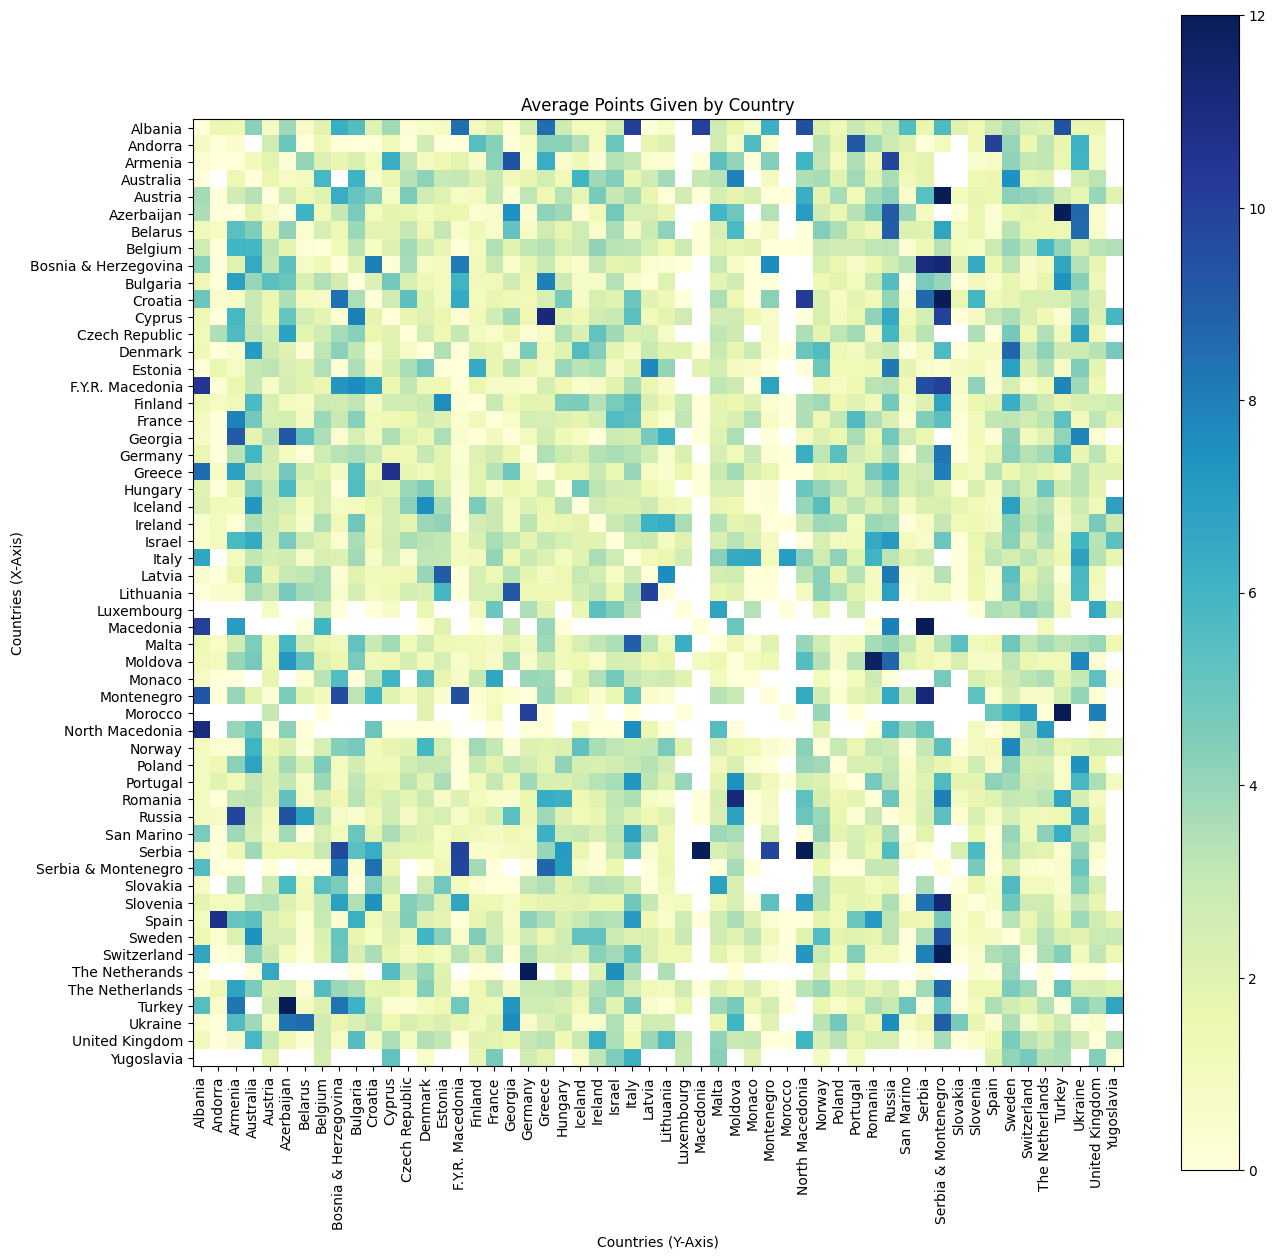

In [47]:
average_points = euro_df.groupby(['From country', 'To country'])['Points'].mean().reset_index()
pivot_table = average_points.pivot(index='From country', columns='To country', values='Points')
plt.figure(figsize=(15, 15))

country_sums = pivot_table.sum(axis=1)

# sorted_countries = country_sums.sort_values(ascending=False).index.tolist()

# pivot_table = pivot_table.loc[sorted_countries, sorted_countries]

plt.imshow(pivot_table, cmap='YlGnBu')
plt.colorbar()  # Add a colorbar for reference
plt.xlabel('Countries (Y-Axis)')
plt.ylabel('Countries (X-Axis)')
plt.title('Average Points Given by Country')
plt.xticks(range(len(pivot_table.columns)), pivot_table.columns, rotation=90)
plt.yticks(range(len(pivot_table.index)), pivot_table.index)
plt.show()

Om aan te tonen dat het stemgedrag van landen beïnvloed wordt door culturele gelijkenissen kijken we naar drie belangrijke culturele aspecten. Gelijkenis van de taal, gelijkenis van de geografische locatie en gelijkenis van de politieke geschiedenis. 

In [48]:
df = pd.read_csv('dist_cepii.csv', sep=';')
cc3_cn = {  # dictionary met drie letterige ISO-code en de bijbehordende landen
    'AFG': 'Afghanistan',
    'ALA': 'Aland Islands',
    'ALB': 'Albania',
    'DZA': 'Algeria',
    'ASM': 'American Samoa',
    'AND': 'Andorra',
    'AGO': 'Angola',
    'AIA': 'Anguilla',
    'ATA': 'Antarctica',
    'ATG': 'Antigua and Barbuda',
    'ARG': 'Argentina',
    'ARM': 'Armenia',
    'ABW': 'Aruba',
    'AUS': 'Australia',
    'AUT': 'Austria',
    'AZE': 'Azerbaijan',
    'BHS': 'Bahamas',
    'BHR': 'Bahrain',
    'BGD': 'Bangladesh',
    'BRB': 'Barbados',
    'BLR': 'Belarus',
    'BEL': 'Belgium',
    'BLZ': 'Belize',
    'BEN': 'Benin',
    'BMU': 'Bermuda',
    'BTN': 'Bhutan',
    'BOL': 'Bolivia',
    'BIH': 'Bosnia and Herzegovina',
    'BWA': 'Botswana',
    'BVT': 'Bouvet Island',
    'BRA': 'Brazil',
    'VGB': 'British Virgin Islands',
    'IOT': 'British Indian Ocean Territory',
    'BRN': 'Brunei Darussalam',
    'BGR': 'Bulgaria',
    'BFA': 'Burkina Faso',
    'BDI': 'Burundi',
    'KHM': 'Cambodia',
    'CMR': 'Cameroon',
    'CAN': 'Canada',
    'CPV': 'Cape Verde',
    'CYM': 'Cayman Islands',
    'CAF': 'Central African Republic',
    'TCD': 'Chad',
    'CHL': 'Chile',
    'CHN': 'China',
    'HKG': 'Hong Kong, Special Administrative Region of China',
    'MAC': 'Macao, Special Administrative Region of China',
    'CXR': 'Christmas Island',
    'CCK': 'Cocos (Keeling) Islands',
    'COL': 'Colombia',
    'COM': 'Comoros',
    'COG': 'Congo (Brazzaville)',
    'COD': 'Congo, Democratic Republic of the',
    'COK': 'Cook Islands',
    'CRI': 'Costa Rica',
    'CIV': 'Cote d\'Ivoire',
    'HRV': 'Croatia',
    'CUB': 'Cuba',
    'CYP': 'Cyprus',
    'CZE': 'Czech Republic',
    'DNK': 'Denmark',
    'DJI': 'Djibouti',
    'DMA': 'Dominica',
    'DOM': 'Dominican Republic',
    'ECU': 'Ecuador',
    'EGY': 'Egypt',
    'SLV': 'El Salvador',
    'GNQ': 'Equatorial Guinea',
    'ERI': 'Eritrea',
    'EST': 'Estonia',
    'ETH': 'Ethiopia',
    'FLK': 'Falkland Islands (Malvinas)',
    'FRO': 'Faroe Islands',
    'FJI': 'Fiji',
    'FIN': 'Finland',
    'FRA': 'France',
    'GUF': 'French Guiana',
    'PYF': 'French Polynesia',
    'ATF': 'French Southern Territories',
    'GAB': 'Gabon',
    'GMB': 'Gambia',
    'GEO': 'Georgia',
    'DEU': 'Germany',
    'GHA': 'Ghana',
    'GIB': 'Gibraltar',
    'GRC': 'Greece',
    'GRL': 'Greenland',
    'GRD': 'Grenada',
    'GLP': 'Guadeloupe',
    'GUM': 'Guam',
    'GTM': 'Guatemala',
    'GGY': 'Guernsey',
    'GIN': 'Guinea',
    'GNB': 'Guinea-Bissau',
    'GUY': 'Guyana',
    'HTI': 'Haiti',
    'HMD': 'Heard Island and Mcdonald Islands',
    'VAT': 'Holy See (Vatican City State)',
    'HND': 'Honduras',
    'HUN': 'Hungary',
    'ISL': 'Iceland',
    'IND': 'India',
    'IDN': 'Indonesia',
    'IRN': 'Iran, Islamic Republic of',
    'IRQ': 'Iraq',
    'IRL': 'Ireland',
    'IMN': 'Isle of Man',
    'ISR': 'Israel',
    'ITA': 'Italy',
    'JAM': 'Jamaica',
    'JPN': 'Japan',
    'JEY': 'Jersey',
    'JOR': 'Jordan',
    'KAZ': 'Kazakhstan',
    'KEN': 'Kenya',
    'KIR': 'Kiribati',
    'PRK': 'Korea, Democratic People\'s Republic of',
    'KOR': 'Korea, Republic of',
    'KWT': 'Kuwait',
    'KGZ': 'Kyrgyzstan',
    'LAO': 'Lao PDR',
    'LVA': 'Latvia',
    'LBN': 'Lebanon',
    'LSO': 'Lesotho',
    'LBR': 'Liberia',
    'LBY': 'Libya',
    'LIE': 'Liechtenstein',
    'LTU': 'Lithuania',
    'LUX': 'Luxembourg',
    'MKD': 'Macedonia, Republic of',
    'MDG': 'Madagascar',
    'MWI': 'Malawi',
    'MYS': 'Malaysia',
    'MDV': 'Maldives',
    'MLI': 'Mali',
    'MLT': 'Malta',
    'MHL': 'Marshall Islands',
    'MTQ': 'Martinique',
    'MRT': 'Mauritania',
    'MUS': 'Mauritius',
    'MYT': 'Mayotte',
    'MEX': 'Mexico',
    'FSM': 'Micronesia, Federated States of',
    'MDA': 'Moldova',
    'MCO': 'Monaco',
    'MNG': 'Mongolia',
    'MNE': 'Montenegro',
    'MSR': 'Montserrat',
    'MAR': 'Morocco',
    'MOZ': 'Mozambique',
    'MMR': 'Myanmar',
    'NAM': 'Namibia',
    'NRU': 'Nauru',
    'NPL': 'Nepal',
    'NLD': 'Netherlands',
    'ANT': 'Netherlands Antilles',
    'NCL': 'New Caledonia',
    'NZL': 'New Zealand',
    'NIC': 'Nicaragua',
    'NER': 'Niger',
    'NGA': 'Nigeria',
    'NIU': 'Niue',
    'NFK': 'Norfolk Island',
    'MNP': 'Northern Mariana Islands',
    'NOR': 'Norway',
    'OMN': 'Oman',
    'PAK': 'Pakistan',
    'PLW': 'Palau',
    'PSE': 'Palestinian Territory, Occupied',
    'PAN': 'Panama',
    'PNG': 'Papua New Guinea',
    'PRY': 'Paraguay',
    'PER': 'Peru',
    'PHL': 'Philippines',
    'PCN': 'Pitcairn',
    'POL': 'Poland',
    'PRT': 'Portugal',
    'PRI': 'Puerto Rico',
    'QAT': 'Qatar',
    'REU': 'Reunion',
    'ROU': 'Romania',
    'RUS': 'Russian Federation',
    'RWA': 'Rwanda',
    'BLM': 'Saint-Barthelemy',
    'SHN': 'Saint Helena',
    'KNA': 'Saint Kitts and Nevis',
    'LCA': 'Saint Lucia',
    'MAF': 'Saint-Martin (French part)',
    'SPM': 'Saint Pierre and Miquelon',
    'VCT': 'Saint Vincent and Grenadines',
    'WSM': 'Samoa',
    'SMR': 'San Marino',
    'STP': 'Sao Tome and Principe',
    'SAU': 'Saudi Arabia',
    'SEN': 'Senegal',
    'SRB': 'Serbia',
    'SYC': 'Seychelles',
    'SLE': 'Sierra Leone',
    'SGP': 'Singapore',
    'SVK': 'Slovakia',
    'SVN': 'Slovenia',
    'SLB': 'Solomon Islands',
    'SOM': 'Somalia',
    'ZAF': 'South Africa',
    'SGS': 'South Georgia and the South Sandwich Islands',
    'SSD': 'South Sudan',
    'ESP': 'Spain',
    'LKA': 'Sri Lanka',
    'SDN': 'Sudan',
    'SUR': 'Suriname',
    'SJM': 'Svalbard and Jan Mayen Islands',
    'SWZ': 'Swaziland',
    'SWE': 'Sweden',
    'CHE': 'Switzerland',
    'SYR': 'Syrian Arab Republic (Syria)',
    'TWN': 'Taiwan, Republic of China',
    'TJK': 'Tajikistan',
    'TZA': 'Tanzania, United Republic of',
    'THA': 'Thailand',
    'TLS': 'Timor-Leste',
    'TGO': 'Togo',
    'TKL': 'Tokelau',
    'TON': 'Tonga',
    'TTO': 'Trinidad and Tobago',
    'TUN': 'Tunisia',
    'TUR': 'Turkey',
    'TKM': 'Turkmenistan',
    'TCA': 'Turks and Caicos Islands',
    'TUV': 'Tuvalu',
    'UGA': 'Uganda',
    'UKR': 'Ukraine',
    'ARE': 'United Arab Emirates',
    'GBR': 'United Kingdom',
    'USA': 'United States of America',
    'UMI': 'United States Minor Outlying Islands',
    'URY': 'Uruguay',
    'UZB': 'Uzbekistan',
    'VUT': 'Vanuatu',
    'VEN': 'Venezuela (Bolivarian Republic of)',
    'VNM': 'Viet Nam',
    'VIR': 'Virgin Islands, US',
    'WLF': 'Wallis and Futuna Islands',
    'ESH': 'Western Sahara',
    'YEM': 'Yemen',
    'ZMB': 'Zambia',
    'ZWE': 'Zimbabwe'
}
df = df.replace({"iso_o": cc3_cn} | {"iso_d": cc3_cn})

# lijst met landen die ooit meededen importeren
with open('landen_die_ooit_meededen.txt') as landen_file:
    landen = landen_file.readlines()
    landen = [land.strip('\n') for land in landen]
    landen = [land.strip('\ufeff') for land in landen]

# filteren op landen die ooit meededen met het songfestival
land_relatie_df = df[df['iso_o'].isin(landen)]
land_relatie_df = land_relatie_df[land_relatie_df['iso_d'].isin(landen)]

# dataframe met data over de onderlinge stemmen opschonen
votes_df = pd.read_csv('votes.csv', sep=';')
cleaned_votes_df = votes_df.drop(columns=['(semi-) final', 'Edition', 'Duplicate']) # kolommmen verwijderen
cleaned_votes_df.replace({'The Netherands': 'The Netherlands', 'F.Y.R. Macedonia':'North Macedonia', 'Macedonia':'North Macedonia'}, inplace=True) #land namen hetzelfde maken
tele_votes_df = cleaned_votes_df[cleaned_votes_df['Jury or Televoting'].isin(['J'])] # alle jury votes verwijderen

# alle kolommen niet relevante kolommen verwijderen. 
land_taal_df = land_relatie_df.drop(columns=['colony', 'comcol', 'curcol', 'col45', 'smctry', 'distcap', 'distw', 'distwces'])
land_taal_df['dist'] = land_taal_df['dist'].str.replace(',', '.')

# voeg de dataframes samen gebaseerd op de kolommen die de landen aangeven
taal_en_votes_df = pd.merge(tele_votes_df, land_taal_df, left_on=['From country', 'To country'], right_on=['iso_o', 'iso_d'])
taal_votes_televoting_df = taal_en_votes_df.drop(columns=['iso_o', 'iso_d', 'Jury or Televoting'])



In [49]:
fig = go.Figure()

# waarde van de punten voor zelfde taal en niet zelfde taal ophalen
same_language_values = taal_votes_televoting_df[taal_votes_televoting_df['comlang_off']==1]['Points      ']
different_language_values = taal_votes_televoting_df[taal_votes_televoting_df['comlang_off']==0]['Points      ']

# plotten
fig.add_trace(go.Box(y=same_language_values, name='Zelfde taal', marker=dict(color=color_blind_green)))
fig.add_trace(go.Box(y=different_language_values, name='Andere taal', marker=dict(color=color_blind_red)))
fig.update_layout(title='Stemmen gebaseerd op overeenkomende taal', width=500, margin=dict(l=10, r=10, t=50, b=10), yaxis=dict(title='Gemiddeld aantal gegeven punten'))

fig.show()

Bovenstaand figuur toont aan dat landen die eenzelfde officiële taal delen, elkaar ongeveer twee keer zo veel punten toekennen.Aangezien taal een cultureel goed is toont deze correlatie aan dat culturele gelijkenis een positieve invloed heeft op het aantal toegekende punten tussen landen onderling. 

In [50]:
fig1 = go.Figure()

# waarde van 
neighboring_values = taal_votes_televoting_df[taal_votes_televoting_df['contig']==1]['Points      ']
not_neighboring_values = taal_votes_televoting_df[taal_votes_televoting_df['contig']==0]['Points      ']

fig1.add_trace(go.Box(y=neighboring_values, name='Aanliggend', marker=dict(color=color_blind_green)))
fig1.add_trace(go.Box(y=not_neighboring_values, name='Niet aanliggend', marker=dict(color=color_blind_red)))
fig1.update_layout(title='Stemmen gebaseerd op naburigheid', width=500, margin=dict(l=10, r=10, t=50, b=10),  yaxis=dict(title='Gemiddeld aantal gegeven punten'))

fig1.show()

Uit figuur 4 blijkt dat naburige landen meer op elkaar stemmen dan op niet-aangrenzende landen. Naburigheid is een indicatie van een culturele overeenkomst. Deze correlatie geeft aan dat culturele gelijkenis een positief effect heeft op het toekennen van punten. 

In [51]:
df_oostblok = pd.read_csv("oostblok.csv")
df_eurovision = pd.read_csv("eurovision_song_contest_1975_2019.csv")
df_eurovision.columns = [column.strip() for column in df_eurovision.columns]

# search oostblok country votes
df_eurovision = pd.merge(left=df_eurovision, right=df_oostblok, how="left", left_on="From country", right_on="Land")
df_eurovision = df_eurovision.rename(columns={"Oostblok" : "from-oostblok"})

# search oostblok country voting receivers
df_eurovision = pd.merge(left=df_eurovision, right=df_oostblok, how="left", left_on="To country", right_on="Land")
df_eurovision = df_eurovision.rename(columns={"Oostblok" : "to-oostblok"})

# remove the land columns
df_eurovision = df_eurovision.drop(columns=["Land_x", "Land_y"])

nob_nob_points_list = []
nob_ob_points_list = []
ob_ob_points_list = []
ob_nob_points_list = []

for i in range(1975, 2019):   
    nob_to_nob = df_eurovision[(df_eurovision['from-oostblok'] == 'Nee') & (df_eurovision['to-oostblok'] =='Nee') & (df_eurovision["Edition"] =='{i}f'.format(i=i))]["Points"]
    nob_nob_points = nob_to_nob.sum()

    nob_to_ob = df_eurovision[(df_eurovision['from-oostblok'] == 'Nee') & (df_eurovision['to-oostblok'] =='Ja') & (df_eurovision["Edition"] =='{i}f'.format(i=i))]["Points"]
    nob_ob_points = nob_to_ob.sum()

    ob_to_ob = df_eurovision[(df_eurovision['from-oostblok'] == 'Ja') & (df_eurovision['to-oostblok'] =='Ja') & (df_eurovision["Edition"] =='{i}f'.format(i=i))]["Points"]
    ob_ob_points = ob_to_ob.sum()

    ob_to_nob = df_eurovision[(df_eurovision['from-oostblok'] == 'Ja') & (df_eurovision['to-oostblok'] =='Nee') & (df_eurovision["Edition"] =='{i}f'.format(i=i))]["Points"]
    ob_nob_points = ob_to_nob.sum()

    nob_nob_points_list.append(nob_nob_points)
    nob_ob_points_list.append(nob_ob_points)
    ob_ob_points_list.append(ob_ob_points)
    ob_nob_points_list.append(ob_nob_points)

trace1 = go.Scatter(x=list(range(1975, 2019)), y=nob_nob_points_list, mode='lines', name='Nob to Nob', line=dict(color='blue'))
trace2 = go.Scatter(x=list(range(1975, 2019)), y=nob_ob_points_list, mode='lines', name='Nob to Ob', line=dict(color='blue', dash='10'))
trace3 = go.Scatter(x=list(range(1975, 2019)), y=ob_ob_points_list, mode='lines', name='Ob to Ob', line=dict(color='red', dash='10'))
trace4 = go.Scatter(x=list(range(1975, 2019)), y=ob_nob_points_list, mode='lines', name='Ob to Nob', line=dict(color='red'))

# Create the data list
data = [trace1, trace2, trace3, trace4]

# Create the layout
layout = go.Layout(title='Points Comparison', xaxis=dict(title='Year'), yaxis=dict(title='Points'))

# Create the figure
fig = go.Figure(data=data, layout=layout)

# Display the figure
fig.show()


Om de gelijkheid van politieke geschiedenis te kunnen toetsen als variabele hebben we gekeken naar het oostblok. Landen die onderdeel zijn geweest van het oostblok hebben een gelijke politieke geschiedenis gehad, of in ieder geval dezelfde politieke invloed. Figuur 5 toont aan dat het niet uitmaakt of er sprake is van een gemeenschappelijke politieke geschiedenis. Deze culturele variabele heeft dus geen impact op het stemgedrag van landen. 

### Conclusie
Culturele aspecten als taal en naburigheid hebben dus impact op het stemgedrag van landen. Een gemeenschappelijke geschiedeinis zoals de Oostblok landen hebben lijkst geen invloed te hebben.

### Niet-culturele factoren
Overige factoren die niets met muziek te maken hebben zijn onder andere queerness van de artiest, of landen in dezelfde semi-final hebben gezeten en X.

In [52]:
# Hier komt de queerness grafiek

Bovenstaand figuur toont aan dat er meer punten toegekend worden aan landen met queer artiesten. Zes procent van alle deelnemers is openlijk queer, maar van alle winnaars is dit zestig procent. Hieruit blijkt dat er een positieve correlatie is tussen queerness van een artiest en het aantal stemmen dat dat land krijgt. De stemming wordt dus beïnvloedt door overige, niet culturele factoren. 

In [53]:
for i in range(2016, 2020):
    candidates_sf1 = euro_df[(euro_df.Edition == '{i}sf1'.format(i=i)) & (euro_df['Jury or Televoting'] == 'T')]['From country']
    sf1 = list(set(candidates_sf1))

    candidates_sf2 = euro_df[(euro_df.Edition== '{i}sf2'.format(i=i)) & (euro_df['Jury or Televoting'] == 'T')]['From country']
    sf2 = list(set(candidates_sf2))


    sf1_to_sf1 = euro_df[(euro_df['From country'].isin(sf1)) & (euro_df.Edition =='{i}f'.format(i=i)) & (euro_df['To country'].isin(sf1))]['Points']
    s11 = sf1_to_sf1.sum()

    sf1_to_sf2 = euro_df[(euro_df['From country'].isin(sf1)) & (euro_df['To country'].isin(sf2)) & (euro_df.Edition=='{i}f'.format(i=i))]['Points']
    s12 = sf1_to_sf2.sum()

    sf2_to_sf2 = euro_df[(euro_df['From country'].isin(sf2)) & (euro_df['To country'].isin(sf2)) & (euro_df.Edition=='{i}f'.format(i=i))]['Points']
    s22 = sf2_to_sf2.sum()

    sf2_to_sf1 = euro_df[(euro_df['From country'].isin(sf2)) & (euro_df['To country'].isin(sf1)) & (euro_df.Edition=='{i}f'.format(i=i))]['Points']
    s21 = sf2_to_sf1.sum()
   
    all_points = sum([s11,s12,s21,s22])
    percentages = [s11/all_points*100, s12/all_points*100, s21/all_points*100, s22/all_points*100]

details = {
    'Year' : ['2016','2016','2016','2016', '2017', '2017', '2017', '2017', '2018', '2018', '2018', '2018', '2019', '2019', '2019', '2019'],
    'from': ['T', 'T', 'F', 'F','T', 'T', 'F', 'F','T', 'T', 'F', 'F','T', 'T', 'F', 'F'],
    'to': ['T', 'F', 'T', 'F','T', 'F','T', 'F','T', 'F','T', 'F','T', 'F','T', 'F'],
    'Percentages' : [27.66830870279146, 22.33169129720854, 18.041871921182263, 31.958128078817733, 32.55336617405583, 17.446633825944172, 26.354679802955665, 23.645320197044335, 30.64449917898194, 21.736453201970445, 23.37848932676519, 24.24055829228243, 17.857142857142858, 30.94525235243798, 12.681779298545765, 38.51582549187339]
}
 
# creating a Dataframe object
df = pd.DataFrame(details)
fig = px.box(df, y='Percentages', color='from', facet_col='to', facet_col_wrap=2, title = 'Analysis of mere-exposure effect')
# Update the layout with new subplot titles
fig.update_traces(
    legendgroup='from',
    name='Votes from Semifinal 1 candidates',
    selector=dict(name='T')
)

fig.update_traces(
    legendgroup='from',
    name='Votes from Semifinal 2 candidates',
    selector=dict(name='F')
)
fig.update_layout(
    title='Analysis of mere-exposure effect',
    annotations=[
        dict(
            x=0.18,
            y=1.02,
            xref='paper',
            yref='paper',
            text='Votes for Semifinal 1 candidates',
            showarrow=False,
            font=dict(size=14)
        ),
        dict(
            x=0.82,
            y=1.02,
            xref='paper',
            yref='paper',
            text='Votes for Semifinal 2 candidates',
            showarrow=False,
            font=dict(size=14)
        )
    ]
)
fig.show()

Figuur 7 toont aan dat landen die aan dezelfde halve finale hebben deelgenomen elkaar meer punten geven. Dit kan onder andere komen door het exposure-effect, een psychologisch fenomeen dat stelt dat mensen een voorkeur ontwikkelen voor dingen die herkenbaarder zijn. De kans is groot dat landen alleen naar hun eigen finale kijken en dus eerder geneigd zijn te stemmen op landen die ze vaker hebben gehoord. Dit blijkt ook uit figuur 7. Deze correlatie toont aan dat bij het stemmen factoren meespelen die noch op de muziek, noch op de cultuur betrekking hebben.

In [54]:
# Hier moet een laatste variabele met grafiek en uitleg komen

# Conclusie
Aangrezende landen stemmen meer op elkaar dan op andere landen. Verder blijkt dat:

Landen die aan dezelfde halve finale hebben deelgenomen, stemmen meer op elkaar dan landen die niet aan dezelfde halve finale hebben deelgenomen.

De indeling van de halve finales is willekeurig.

Dit doet vermoeden dat landen vaak alleen naar hun eigen halve finale kijken, en dus eerder geneigd zijn om te stemmen op landen die ze vaker hebben gehoord.

Naburigheid is een indicatie van culturele overeenkomst.

Culturele overeenkomst tussen twee landen heeft dus een positief effect op het aantal punten dat zij elkaar toekennen.
